## Introduction

In this document you can find some exercises which build upon your knowledge.

<hr style="border:2px solid #eee">

## Exercise 1: Modelling statistical data?

In this exercise we will show how curve fitting can be used to evaluate the trade-off between accuracy and computational expense in a system studied in the homework exercises. 

### Part 1: Recalling the problem 

Go back to `homework1.ipynb` and recall exercise 1, with the solution that can be found below:

In [1]:
#! IGNORE EXPECTED OUTPUT
# Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt

# Ensuring reproducibility
np.random.seed(0)

# Defining function which estimates pi as a function of N
def estimate_pi(N):
    # Generating random points 
    M = np.random.rand(2, N)
    
    # Estimating f
    f = (M[0,:]**2 + M[1,:]**2 <= 1).sum()/N
    
    # Returning pi approximation
    return 4*f

# Example usage
print(estimate_pi(10000)) # \approx 3.14

3.1472


### Part 2: Examining the statistical relationships in $\pi$ approximations

Make a histogram of the outputs of `estimate_pi(N)` for 5 `N` of your choice with at least `200` samples each. Additionally, find a way to display the standard deviation and mean on your plots. What trend do you observe? What kind of distribution do you think this could be?

> Tip: Remember to use `np.random.seed(0)` for reprodicibility of results.

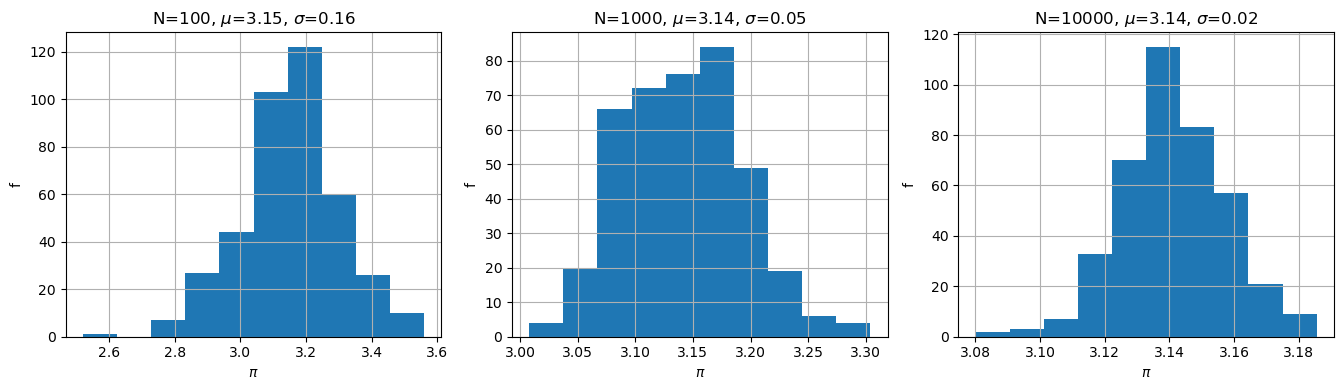

In [2]:
#! BEGIN ANSWER
# Ensuring reproducibility
np.random.seed(0)

def make_histogram(N, samples = 200):
    estimates = [estimate_pi(N) for _ in range(samples)]
    return estimates

def plot_histograms(N_list, samples = 200):
    # Getting the estimates:
    histograms = [make_histogram(N, samples) for N in N_list]
    
    # Plotting the results
    plt.figure(figsize=(6*len(N_list), 4))
    for i, h in enumerate(histograms):
        plt.subplot(111+len(N_list)*10+i)
        plt.hist(h)
        plt.title("N=%i, $\\mu$=%.2f, $\\sigma$=%.2f"%(N_list[i],np.mean(h),np.std(h)))
        plt.xlabel("$\\pi$")
        plt.ylabel("f")
        plt.grid()
        
    plt.tight_layout()
    plt.show()
    
plot_histograms([100, 1000, 10000], 400)
#! END ANSWER

### Part 3: Checking for normality 

Let us try to use a normal distribution to explain the shape of the graphs in part 3. Use the shapiro test for confirmation of normality.

> Tip: Remember to use `np.random.seed(0)` for reprodicibility of results.

In [3]:
#! BEGIN ANSWER
# Importing some useful functions to test for normality
from scipy.stats import shapiro 

# Ensuring reproducibility
np.random.seed(0)

# Making function to examine normality of pi approximations
def shapiro_tests(N_list, samples = 200):
    # Getting the estimates:
    histograms = [make_histogram(N, samples) for N in N_list]
    
    # Testing for normality
    for i, h in enumerate(histograms):
        #perform Shapiro-Wilk test for normality
        s = shapiro(h)
        print("Shapiro for N=%i: pvalue>0.05 ="%N_list[i], s.pvalue > 0.05)
    

shapiro_tests([100, 500, 1000, 5000, 10000], 1000)
#! END ANSWER

Shapiro for N=100: pvalue>0.05 = False
Shapiro for N=500: pvalue>0.05 = False
Shapiro for N=1000: pvalue>0.05 = True
Shapiro for N=5000: pvalue>0.05 = True
Shapiro for N=10000: pvalue>0.05 = True


As you might have observed, the shapiro test tends to fail some of the time, so it is not possible to conclude whether or not the data is normal or not, but for the sake of this exercise, we continue under the assumption that it is.

### Part 4: Predicting the standard deviation

Try to curve fit the standard deviation $\sigma$ against the number of points `N` in the approximation.
> Start by investigating what kind of relationship exists between `N` and $\sigma$ with plots.

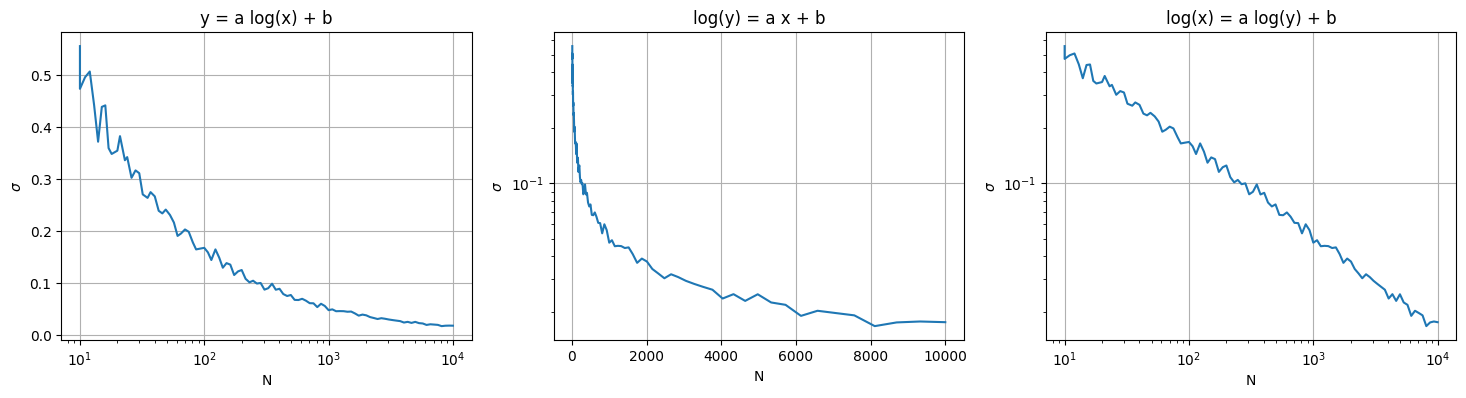

In [4]:
#! BEGIN ANSWER
# Making function to estimate the standard deviation vs N
def estimate_stds(N_list, samples):
    return np.array([np.std(make_histogram(N, samples)) for N in N_list])

# Estimating data 
N_list = np.logspace(1,4,100).astype(int)
stds = estimate_stds(N_list, 200)

# Plotting stds vs N to get a relationship between the two
plt.figure(figsize=(6*3, 4))
labels = {'semilogx': 'y = a log(x) + b', 
          'semilogy': 'log(y) = a x + b', 
          'loglog': 'log(x) = a log(y) + b'}
for i,(ptype, ptitle) in enumerate(labels.items()):
    plt.subplot(131+i)
    getattr(plt, ptype)(N_list, stds)
    plt.xlabel("N")
    plt.ylabel("$\\sigma$")
    plt.grid()
    plt.title(ptitle)
plt.show()
#! END ANSWER

> Now try to fit the curve using a relationship of your choice

> Hint: The equation $\log(\sigma) = a\log(N) + b$ is linear in $log(N)$ and can be fitted with np.polyfit.

In [5]:
#! BEGIN ANSWER
# Generating data to fit the curve:
N_list = np.logspace(1,4,100).astype(int)
stds = estimate_stds(N_list, 200)

(slope, intercept) = np.polyfit(np.log(N_list), np.log(stds), deg=1)
#! BEGIN EXCLUDE
print("Slope is: %.4f\nIntercept is: %.4f"%(slope, intercept))
#! END EXCLUDE
#! END ANSWER

Slope is: -0.5039
Intercept is: 0.5093


Before moving on to the next question, observe that both slope and intercept lie near $\pm0.5$, do you think this is coincidence?

### Part 5: Checking if the assumption of normality is at least acceptable

Use the fitted parameters to plot a bell curve over the aforeploted histograms (remember to normalize them using `np.trapz` or `plt.hist(..., density=True)`). As a reminder the normal distribution is given by:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma} \right)^2}$$

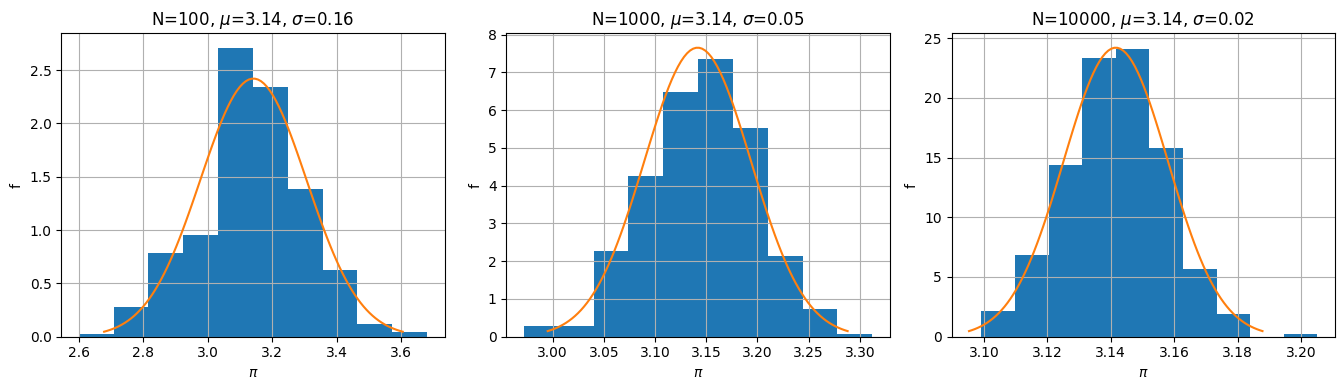

In [6]:
#! BEGIN ANSWER
def plot_normal_distributions(N_list, samples = 200):
    # Getting the estimates:
    histograms = np.array([make_histogram(N, samples) for N in N_list])
    
    # Plotting the results
    plt.figure(figsize=(6*len(N_list), 4))
    for i, h in enumerate(histograms):
        # Making the subplot 
        plt.subplot(111+len(N_list)*10+i)
        
        # Plotting the histogram
        plt.hist(h, density=True, label='hist')
        
        # Plotting the bell curve
        sig = np.exp(-0.5*np.log(N_list[i])+0.5)
        conf99_5 = 2.807
        x = np.linspace(-conf99_5*sig,conf99_5*sig, 100)+np.pi
        y = 1/(sig*np.sqrt(2*np.pi))*np.exp(-1/2*((x-np.pi)/sig)**2)
        plt.plot(x, y, label="bell curve")
        
        # Labeling the plot
        plt.title("N=%i, $\\mu$=%.2f, $\\sigma$=%.2f"%(N_list[i],np.mean(h),np.std(h)))
        plt.grid()
        plt.xlabel("$\\pi$")
        plt.ylabel("f")
        
    plt.tight_layout()
    plt.show()
    
plot_normal_distributions([100, 1000, 10000], 400)
#! END ANSWER

### Part 6: Predicting error margins

If you did the above correctly, you should have observed a very good agreement between the curves, meaning the curve fit was appropriate of the standard deviation. The next step is to try and predict the 95% confidence intervals for the $\pi$ estimate vs `N` and compare that to the computational expense which will be measured in execution time.

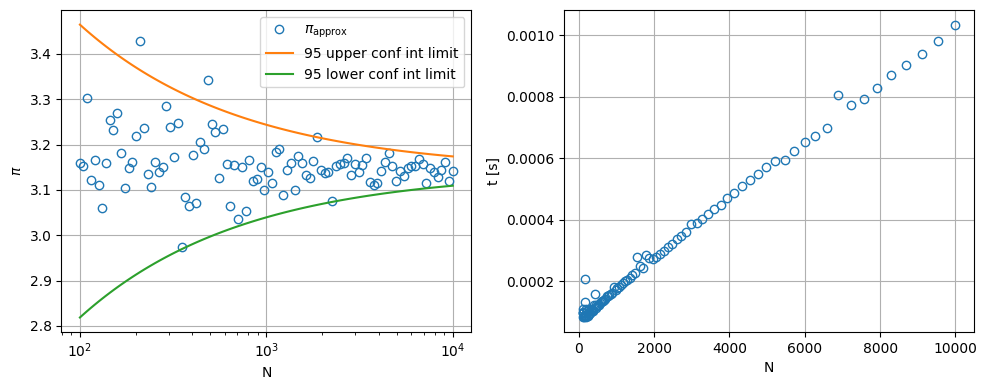

In [7]:
#! BEGIN ANSWER
# Generating data for plot 
N_list = np.logspace(2, 4, 100).astype(int)
mu = np.pi
sig = np.exp(-0.5*np.log(N_list)+0.5)
conf95 = 1.960
upper_bound = conf95*sig + mu # Line which should enshrould most peaks in N vs pi plots!
lower_bound = -conf95*sig + mu

# Measuring computational expense
from timeit import timeit
measure = lambda N: timeit("estimate_pi(%i)"%N, number=10, globals=globals())
durations = np.array([measure(N) for N in N_list])

# Plotting the result 
estimates = np.array([estimate_pi(N) for N in N_list])

plt.figure(figsize=(10, 4))
# Checking the result 
plt.subplot(121)
plt.semilogx(N_list, estimates, lw=0, marker='o', mfc='none', label="$\\pi_\\mathrm{approx}$")
plt.semilogx(N_list, upper_bound, label="95 upper conf int limit")
plt.semilogx(N_list, lower_bound, label="95 lower conf int limit")
plt.xlabel("N")
plt.ylabel("$\\pi$")
plt.legend()
plt.grid()

# PLotting the durations 
plt.subplot(122)
plt.plot(N_list, durations, lw=0, marker='o', mfc='none')
plt.xlabel("N")
plt.ylabel("t [s]")
plt.grid()
plt.tight_layout()
plt.show()
#! END ANSWER

With these plots one could easily tune their machine to be as fast as possible at estimating parameters while being able to choose the error margins.

> Now run the cell below to clear all your variables before moving on to the next exercise

In [8]:
%reset -f

## Exercise 2: Full chemical reaction characterization

In this exercise you will model a chemical reaction's parameters from experimental data. The reaction takes place in a vial and the product absorbs light at a frequency of 900hz.

### Part 1: Determining the calibration curve

A calibration curve is made by placing the product in a spectrophotometer at different concentrations. The data for this calibration curve can be found in `calibration_curve.txt`. Make the calibration curve yourself by trying different models to fit the data. 
> Tip: If you try an exponential model for the curve, make sure your exponential term is negative so the function does not blow up. Something like $a\exp(-c*b)$ with an initial guess `b>0` should do the trick.

In [9]:
#! BEGIN EXCLUDE
# GENERATING CALIBRATION DATA FOR THIS EXERCISE
import numpy as np
import matplotlib.pyplot as plt 

# Ensuring reproducibility
np.random.seed(0)

# Generating the calibration data 
def calibration(c):
    return 2*np.exp(-c/5)

c = np.linspace(0, 10, 100)
ab = calibration(c) + (np.random.rand(len(c))-0.5)*0.2

# Saving the data 
def save_data(filename, labels, matrix):
    with open(filename, "w") as f:
        f.write("\t".join(labels))
        for row in matrix:
            f.write("\n"+"\t".join(["%.4f"%n for n in row]))

data = np.vstack([c, ab]).T
save_data("calibration_curve.txt", ["c [M]", "Abs [-]"], data)
#! END EXCLUDE

R^2>0.95: True


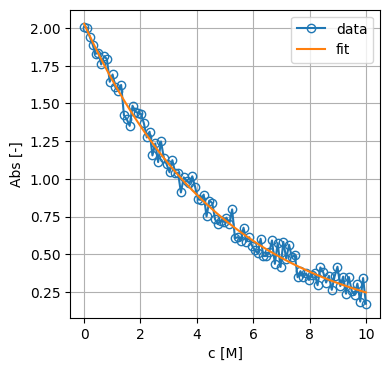

In [10]:
#! BEGIN ANSWER
# Importing relevant libraries
import numpy as np
from scipy.optimize import curve_fit

# Fitting the data to an arbitrary calibration curve
def calibration(c, a, b, d):
    return a*np.exp(b*c) + d

# Inverse of that calibration curve 
def inv_calibration(ab, a, b, d):
    c = np.log((ab-d)/a)/b
    return c

# Loading the data 
data = np.loadtxt("./calibration_curve.txt", skiprows=1)
c, ab = data.T

# Fitting coefficients for calibration curve
cal_args, _ = curve_fit(calibration, c, ab, [1, -1, 1])

# Calculating goodness of fit
ssreg = np.sum((calibration(c, *cal_args) - np.mean(ab))**2)
sstot = np.sum((ab -  np.mean(ab))**2)
R2 = ssreg / sstot
print("R^2>0.95: %s"%(R2>0.95)) # GOOD FIT

# Checking the result visually
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(c, ab, marker='o', mfc='none', label = "data")
plt.plot(c, calibration(c, *cal_args), label = "fit")
plt.xlabel("c [M]")
plt.ylabel("Abs [-]")
plt.grid()
plt.legend()
plt.show()
#! END ANSWER

### Part 2: Determining the reaction order 

To determine the reaction order measurements were made at the same temperature and different concentrations. The data set containing the absorbance vs time can be found in `order_experiment.txt`. Fit the reaction order for this reaction using a batch reactor model with unknown reaction order.

In [11]:
#! BEGIN EXCLUDE 
# GENERATING THE DATA
from scipy.integrate import odeint 

# Ensuring reproducibility
np.random.seed(0)

def batch(t, n = 0.68, c0 = 1):
    return odeint(lambda c, t: -0.3*c**n, [c0], t).ravel()

# Generating the data 
t = np.linspace(0, 10, 100)
c = np.abs(batch(t) + (np.random.rand(len(t))-0.5)*0.025)
ab = calibration(c, *cal_args) 
data = np.vstack([t, ab]).T

# Saving the data 
save_data("order_experiment.txt", ["t [s]", "Abs [-]"], data)
#! END EXCLUDE

Order =0.6647


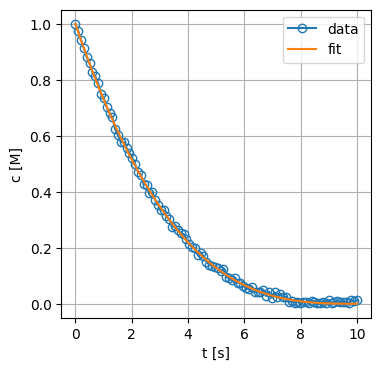

In [12]:
#! BEGIN ANSWER
from scipy.integrate import odeint 
from scipy.optimize import curve_fit
from scipy.interpolate import splrep, BSpline

# Loading data
data = np.loadtxt("./order_experiment.txt", skiprows=1)
t, ab = data.T
c = inv_calibration(ab, *cal_args)

# Smoothing the data
c_smooth = BSpline(*splrep(t, c, s=10))(t)

# Trying to fit the reaction order
def conc_func(t, k, n):
    def rate_func(c, t):
        return -k*c**n
    return odeint(rate_func, c_smooth[0], t).ravel()

(k, order), _ = curve_fit(conc_func, t, c_smooth, [0.2, 1])
print("Order =%.4f"%order)

# Plotting the final result to check if it fits with given data
c_fit = conc_func(t, k, order)
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(t, c, marker='o', mfc='none', label='data')
plt.plot(t, c_fit, label='fit')
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("c [M]")
plt.grid()
plt.show()
#! END ANSWER

If you did everything correctly until now, you should have a reaction order of *around* 0.7.


### Part 3: Determining the rate of reaction at different temperatures

To determine the activation energy of this reaction, it was necessary to perform experiments at different temperatures. The data gathered contains several concentration vs time series. Use these to estimate $k(T)$.
> Tip: Your life will be a lot easier if you group the data according to temperature. Additionally, if your fit uses a pre-exponential factor, make sure your initial guess is in the order `1e7`. If another initial guess makes everything go kaput, just try different values (different order of magnitude).

In [13]:
#! BEGIN EXCLUDE
# Generating temperature dependent constants 
Ts = np.array([25.0, 50.0, 70.0, 90.0, 100.0])+273.15
ks = 1e7*np.exp(-58e3/(8.31*Ts))
t = np.linspace(0, 30, 100)

# Generating the data 
data = []
for i,(k,T) in enumerate(zip(ks, Ts)):
    T_exp = np.tile(T, (len(t)))
    c_exp = odeint(lambda c,t: -k*c**order, c_smooth[0], t).ravel()
    data.append(np.vstack((t, T_exp, calibration(c_exp,*cal_args))).T)
    
# Plotting data
# for d in data:
#     t, _, c = d.T
#     plt.plot(t, c)

# Reshaping the data into matrix
data = np.reshape(data, (-1, 3)) 
 
# Saving the data 
save_data("kinetics_experiments.txt", ["t [s]", "T [K]", "Abs [-]"], data)
#! END EXCLUDE

In [14]:
#! BEGIN ANSWER
from scipy.optimize import curve_fit

# Loading the data
data = np.loadtxt("./kinetics_experiments.txt", skiprows=1)
n = len(np.unique(data[:, 1])) # Number of unique temperatures
exps = np.reshape(data, (n, -1, 3)) # Experiments can be indexed by first index
exps[..., -1] = inv_calibration(exps[..., -1], *cal_args) # Getting concentrations

# Solving for all the k(T)'s
def find_k(t, c):
    c_smooth = BSpline(*splrep(t, c, s=10))(t)
    def conc_func(t, k):
        return odeint(lambda c, t: -k*c**order, c_smooth[0], t).ravel()
    (k,),_ = curve_fit(conc_func, t, c_smooth, [0.01])
    return k

# Getting k
ks = [find_k(exp[:,0],exp[:,2]) for exp in exps]

# Getting T
Ts = np.unique(data[...,1]).ravel()

# Fitting kinetic parameters 
def kinetic_func(T, Ea, k0):
    return k0*np.exp(-Ea/(8.31*T))

(Ea, k0), _ = curve_fit(kinetic_func, Ts, ks, [1e4, 5e6])
print("Curve fit:\n`Ea` = %.4f\n`k0` = %.4f\n"%(Ea, k0))

# Better strategy
(slope, intercept) = np.polyfit(1/Ts, np.log(ks), deg=1)
Ea = -8.31*slope
k0 = np.exp(intercept)
print("Polyfit:\n`Ea` = %.4f\n`k0` = %.4f"%(Ea, k0))
#! END ANSWER

Curve fit:
`Ea` = 58007.4700
`k0` = 10024711.1835

Polyfit:
`Ea` = 57993.4601
`k0` = 9977325.4609


### Part 4: Measuring the enthalpy of reaction

The enthalpy of reaction can be measured assuming one knows the rate at which energy is released by the reaction according the following equation:

$$ \frac{\partial T}{\partial t} = -\frac{r\Delta_rH}{\rho \mathrm{C_p}}$$

Some data was collected in an experiment wherein the reaction with an initial concentration of 1 M was allowed to happen in a stirred batch reactor with a heat conductivity of $U=1 W/m^2/K$ and an open surface area of $A=0.1m^2$ and volume $V=0.1L$. Use this data, which can be found in `heat_experiment.txt` to fit the enthalpy change of this reaction.

* $rho=1 \mathrm{kg/L}$
* $\mathrm{C_p} = 4180 \mathrm{J/L/K}$
* $T_\mathrm{room} = 5C$

In [15]:
#! BEGIN EXCLUDE
# Generating data
params = {
    "k0": k0,
    "n": order,
    "Ea": Ea,
    "rho": 1,
    "Cp": 4180,
    "DH": -45e3, # J/mol
    "U": 1,
    "A": 0.1,
    "Troom": 5+273,
    "V": 0.1 # L
}

def rate_func(y, t, p):
    c, T = y
    r = p["k0"]*np.exp(-p["Ea"]/(8.31*T))*c**p["n"]
    dcdt = -r
    dTdt = (-r*p["DH"] + p["U"]*p["A"]*(p["Troom"]-T)/p["V"])/(p["rho"]*p["Cp"])
    return np.array([dcdt, dTdt])

# Generating the data 
t = np.linspace(0, 860, 100)
y = odeint(rate_func, [1, 310], t, (params,))
c = y[:,0]
T = y[:,1] + (np.random.rand(len(t))-0.5)/2

# Saving the data 
data = np.vstack((t, T)).T
save_data("heat_experiment.txt", ["t [s]", "T [K]"], data)
#! END EXCLUDE

In [16]:
#! BEGIN ANSWER
# Generating data
params = {
    "k0": k0,
    "n": order,
    "Ea": Ea,
    "rho": 1,
    "Cp": 4180,
    "U": 1,
    "A": 0.1,
    "Troom": 5+273,
    "c0": 1,
    "V": 0.1 # L
}

# Loading the data 
data = np.loadtxt("./heat_experiment.txt", skiprows=1)
t, T = data.T

# Smoothing the data 
T_smooth = BSpline(*splrep(t, T, s=10))(t)

# Saving starting temperature 
params['T0'] = T_smooth[0]

def rate_func(y, t, p):
    c, T = y
    r = p["k0"]*np.exp(-p["Ea"]/(8.31*T))*c**p["n"]
    dcdt = -r
    dTdt = (-r*p["DH"] + p["U"]*p["A"]*(p["Troom"]-T)/p["V"])/(p["rho"]*p["Cp"])
    return np.array([dcdt, dTdt])

def y_func(t, DH):
    p = {k:v for k,v in params.items()} # Copy of params
    p["DH"] = DH
    return odeint(rate_func, [p["c0"], p["T0"]], t, (p,))[:,1] # Return T over time

(DH,), _ = curve_fit(y_func, t, T, [-30e3])
params["DH"] = DH
#! END ANSWER

If all your fitted parameters look as follows (values need to be close), you have successfuly completed this assignment:
```python
{
 'k0': 9918890.8942, # 1/s 
 'n': 0.7075,  
 'Ea': 57977.2461, # J/mol
 'rho': 1, # kg/L
 'Cp': 4180, # J/kg/K
 'U': 1, # w/m2/K
 'A': 0.1, # m2
 'Troom': 278, # K
 'c0': 1, # M
 'V': 0.1,# L
 'T0': 310, # K 
 'DH': -45078.352 # J/mol
}
```

> Now run the cell below to clear all your variables before moving on to the next exercise

In [17]:
%reset -f

### Exercise 3: Fitting number of CSTR in series

Since the number of cstr in series is a discrete measure, it can not be varied in gradient methods. This means that minimization procedures fail in this regard and a more brute force approach has to be used for fitting the number of CSTRs. In this exercise we explore a way to make the number of CSTRs a continuous variable.

This method involves using remainder division to change the volume of the last CSTR. So, for example, soppose we have a number of 7.5 CSTRs in series. The first CSTR will have a value of 0.5$V$, where $V$ is the volume of a whole CSTR.

### Part 1: Make the cstr in series model with non-integer number os cstrs

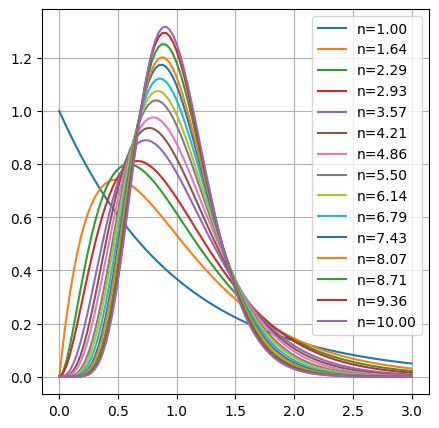

In [18]:
#! BEGIN ANSWER 
# Importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

# Making the rate func
def rate_func(c, t, p):
    return p["F"]/p["V"]*(np.hstack(([p["cin"]], c[:-1]))-c)

# Making function to generate intial conditions and volume array
def make_arrays(p, beginning=False):
    int_n = int(p["n_cstr"])
    rem = p["n_cstr"]%1
    y0 = np.array([0]*int_n + ([0] if rem > 1e-4 else []), float)
    V = np.array([1]*int_n + ([rem] if rem > 1e-4 else []), float)
    if beginning: # Reverse the array
        V = V[::-1]
    V = V/np.sum(V)*p["V_tot"]
    y0 = np.array(y0)
    y0[0] = 1.0/V[0]
    return V, y0

# Testing it with variable CSTRs in series
p = {
    "V_tot": 1,
    "F": 1,
    "cin": 0
}
t = np.linspace(0, 3, 100)

#! BEGIN EXCLUDE
plt.figure(figsize=(5,5))
#! END EXCLUDE
# Plotting the different profiles
for n in np.linspace(1, 10, 15):
    p["n_cstr"] = n
    p["V"], y0 = make_arrays(p)
    c = odeint(rate_func, y0, t, (p,))
    plt.plot(t, c[:,-1], label="n=%.2f"%n)
    
plt.legend()
plt.grid()
plt.show()
#! END ANSWER

### Part 2: Use this model to fit a data set

You can find the data for a pulse experiment in file `non_integer_cstrs.txt`. Remember to clean the data so it is ready for comparison.

> Note: Due to the nature of this curve, the convergence might be bad, so start with an initial guess of around 8.5.

In [89]:
#! BEGIN EXCLUDE
# Importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

# Ensuring reproducibility
np.random.seed(0)

# Making the rate func
def rate_func(c, t, p):
    dcdt = p["F"]/p["V"]*(np.hstack(([p["cin"]], c[:-1]))-c)
    dcdt[1:-1] += 5*(c[0:-2]-2*c[1:-1]+c[2:])
    return dcdt

# Making function to generate intial conditions and volume array
def make_arrays(p, beginning=False):
    int_n = int(p["n_cstr"])
    rem = p["n_cstr"]%1
    y0 = np.array([0]*int_n + ([0] if rem > 1e-4 else []), float)
    V = np.array([1]*int_n + ([rem] if rem > 1e-4 else []), float)
    if beginning: # Reverse the array
        V = V[::-1]
    V = V/np.sum(V)*p["V_tot"]
    y0 = np.array(y0)
    y0[0] = 1.0/V[0]
    return V, y0

# Testing it with variable CSTRs in series
p = {
    "V_tot": 1,
    "F": 1,
    "cin": 0
}
t = np.linspace(0, 3, 100)
p["n_cstr"] = 9.5
p["V"], y0 = make_arrays(p)
c = odeint(rate_func, y0, t, (p,))[:,-1] + (-0.5+np.random.rand(len(t)))*0.1 - 0.5
#plt.plot(t, c)

# Saving the data 
def save_data(filename, labels, matrix):
    with open(filename, "w") as f:
        f.write("\t".join(labels))
        for row in matrix:
            f.write("\n"+"\t".join(["%.4f"%n for n in row]))
            
save_data("non_integer_cstrs.txt", ["t [s]", "c_{N-1} [M]"], np.vstack((t,c)).T)
#! END EXCLUDE

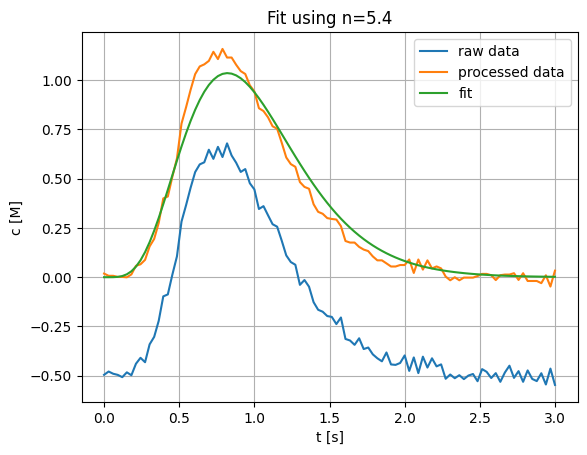

In [91]:
#! BEGIN ANSWER
# Importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import medfilt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

# Making the rate func
def rate_func(c, t, p):
    return p["F"]/p["V"]*(np.hstack(([p["cin"]], c[:-1]))-c)

# Making function to generate intial conditions and volume array
def make_arrays(p, beginning=False):
    int_n = int(p["n_cstr"])
    rem = p["n_cstr"]%1
    y0 = np.array([0]*int_n + ([0] if rem > 1e-4 else []), float)
    V = np.array([1]*int_n + ([rem] if rem > 1e-4 else []), float)
    if beginning: # Reverse the array
        V = V[::-1]
    V = V/np.sum(V)*p["V_tot"]
    y0 = np.array(y0)
    y0[0] = 1.0/V[0]
    return V, y0

def fit_func(t, n):
    # Testing it with variable CSTRs in series
    p = {
        "V_tot": 1,
        "F": 1,
        "cin": 0
    }
    p["n_cstr"] = n
    p["V"], y0 = make_arrays(p)
    c = odeint(rate_func, y0, t, (p,))[:,-1]
    #plt.plot(t, c)
    return c

# Loading the data and performing the fit
t_exp, c_exp = np.loadtxt("non_integer_cstrs.txt", skiprows=1, delimiter="\t").T

# Visualizing the data 
plt.plot(t_exp, c_exp, label = "raw data")

# Note that we have to translate it upwards and smooth it
# Smoothing 
c_smooth = medfilt(c_exp, (3,))

# Moving it up
c_good = c_smooth - c_smooth[t>2.5].mean()

# Plotting the final result
plt.plot(t_exp, c_good, label = "processed data")

# Fitting and plotting the result
(n_fit,),_ = curve_fit(fit_func, t_exp, c_good, [8.5], method="dogbox")

c_fit = fit_func(t_exp, n_fit)
plt.plot(t_exp, c_fit, label = "fit")
plt.xlabel("t [s]")
plt.ylabel("c [M]")
plt.title("Fit using n=%.1f"%n_fit)
plt.legend()
plt.grid()
#! END ANSWER

### Part 3: Let your imaginarion run wild

You might have noticed that the fit was not perfect. There are many reasons why that could not be the case. Think of additions you can make to your model to account for these differences. Remember, there is no right or wrong here, just try different things until you get a good fit.

As an example, think about dispersion, which can be modelled like diffusion.

> Now run the cell below to clear all your variables before moving on to the next exercise

In [19]:
%reset -f

## Exercise 3: Animation

For complex data formats it may be worthwhile to visualize the evolution of profiles over time. For this reason, the hability to animate with matplotlib can be valuable for engineering applications. Since animation can be a little bit complicated to explain, a example has been setup with a step by step description of what each line does. Follow along before getting to the exercise 

<hr style="border:2px solid #eee">

Code example:
```python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


# Creating the plot GUI which can be updated in real time
%matplotlib

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
line, = ax.plot([], [], 'b-')  # Create an empty Line2D object

# Initialize the data
x_data = np.linspace(0, 10, 100)
y_data = np.sin(x_data)
line.set_data(x_data, y_data)  # Set initial data to the Line2D object

# Animation loop
for i in range(100):
    y_data = np.sin(x_data + i * 0.1)  # Update the y-data for animation
    line.set_data(x_data, y_data)  # Update Line2D data
    
    ax.draw_artist(ax.patch)  # Redraw the axes background
    ax.draw_artist(line)      # Redraw the Line2D object
    
    fig.canvas.flush_events()  # Flush the canvas events to update the plot
    plt.pause(0.01)            # Introduce a short pause to control the frame rate

# Closing the current figure 
plt.close()

# Returning to plotting on notebook
%matplotlib inline
```
<div class="alert alert-block alert-info">
    
1. <h4 style="font-weight: 600;">Import necessary libraries</h4> Import the required libraries, including numpy for data manipulation and matplotlib.pyplot for creating plots.

1. <h4 style="font-weight: 600;">Set up the figure and axis</h4> Create a figure and axis using `plt.subplots()`, and set the x and y limits for the plot.

1. <h4 style="font-weight: 600;">Create the Line2D object</h4> Create an empty `Line2D` object using `ax.plot()` with an empty data array. This object will be used to represent the animated line.

1. <h4 style="font-weight: 600;">Initialize data</h4> Create initial x and y data for the `Line2D` object, and set the initial data using `line.set_data()`.

1. <h4 style="font-weight: 600;">Animation loop</h4> Iterate through animation frames. Update the y-data based on the animation frame, set the new data using `line.set_data()`, and redraw the axes background and `Line2D` object using `ax.draw_artist()`. Then, use `fig.canvas.flush_events()` to update the canvas and introduce a short pause with `plt.pause()` to control the frame rate.

1. <h4 style="font-weight: 600;">Close the plot</h4>Finally, use `plt.close()` to close the animated plot.

This method gives you fine-grained control over the animation process by manually updating the plot at each step. It's useful when you need more control over animations or want to integrate animations with other components. However, for more complex animations, Matplotlib's built-in animation tools might offer a more convenient and powerful approach.
</div>

<hr style="border:2px solid #eee">

Using the aforementioned steps, you will be making an animation of a developing concentration profile in a cstr in series model while monitoring the conditions at the outlet in real time.

### Part 1: Making the model

Write a cstr in series model (or copy it from a previous exercise). More specifically, write down the dependencies for integration, but don't integrate it yet. We will make our own ODE solver for this one, and it will take in the same inputs as `odeint`.

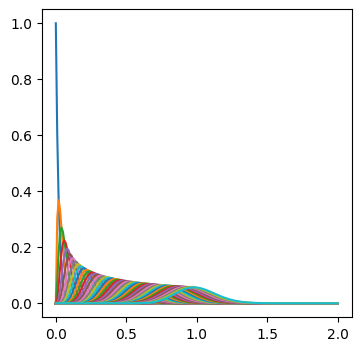

In [20]:
#! BEGIN ANSWER
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Setting up constants
n_cstr = 50
V_tot = 1
F = 1
pfr = {
    "n": n_cstr,
    "cin": [0],
    "c0": np.array([1]+[0]*(n_cstr-1),float),
    "V_tot": V_tot,
    "V": V_tot/n_cstr,
    "F": F,
    "tau": V_tot/n_cstr/F,
    "t": np.linspace(0, 2, 200),
    "cstr_id": np.arange(n_cstr)
}

# Rate function
def rate_func(c, t, p):
    concat = lambda *a: np.concatenate(a, axis=0)
    return 1/p["tau"] * (concat(p["cin"],c[:-1]) - c)

# Testing it
c = odeint(rate_func, pfr["c0"], pfr["t"], (pfr,))

# Plotting the result for confirmation the model is ok
%matplotlib inline
#! BEGIN EXCLUDE
plt.figure(figsize=(4,4))
#! END EXCLUDE
plt.plot(pfr["t"], c)
plt.show()
#! END ANSWER

### Part 2: Setting up a solver which can be modified to allow for plotting

Create a simple Euler solver that does not store data from the past iteration. If you do not remember how euler integration works, you can read this explanation. 

Furthermore, make sure that this solver allows for animation, then test it with the cstr in series model. That is, plot the id of the cstr on the x axis ranging from 0 to the number of CSTRs-1 and the concentration in the y axis.

Play around with the parameters to get a nice animation.

In [21]:
#! BEGIN ANSWER
def euler(rate_func, y0, t, args):
    # Setting up the figure 
    fig, ax = plt.subplots()
    ax.set_xlim(0, len(y0))
    ax.set_ylim(0, 1)
    ax.set_xlabel("cstr_id")
    ax.set_ylabel("c [M]")
    
    # integration and animation
    y = np.array(y0)
    x = args["cstr_id"]
    for i, tcurr in enumerate(t):
        if i == 0: 
            line, = plt.plot(x, y)
            continue
        # Advancing a time step
        dt = tcurr-t[i-1]
        y[:] += rate_func(y, tcurr, args)*dt
        
        # Updating the figure 
        line.set_data(x, y)
        ax.draw_artist(ax.patch)
        ax.draw_artist(line)
        fig.canvas.flush_events()
        plt.pause(0.01)
        
    # closing the figure 
    plt.close()
    
%matplotlib
euler(rate_func, pfr["c0"], pfr["t"], pfr)
%matplotlib inline
#! END ANSWER

Using matplotlib backend: <object object at 0x0000020DA13A78A0>


> Now run the cell below to clear all your variables before moving on to the next exercise

In [22]:
%reset -f